In [129]:
%%capture
%run final_chars_classification.ipynb



In [130]:
%run table_detector.ipynb

In [131]:
%run final_functions.ipynb

In [132]:
%run preprocessing.ipynb

In [133]:
%run get_rows_number.ipynb

In [134]:
# initialize_models(True)
load_models()

In [135]:
from tabular import tabular
import math

In [138]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, False)#, table= True)

        letters = [classify(i, is_letter=True, is_table=is_table) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True, is_table=is_table) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if showTrace:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        num_outputs = col_num-int(math.log(row_num-1,2))
        print(num_outputs)
        solver.solve(cells=numbers,num_col=col_num,num_outputs=num_outputs)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        result = [get_table(expression) for expression in expressions]
        for r in result:
            print(r)

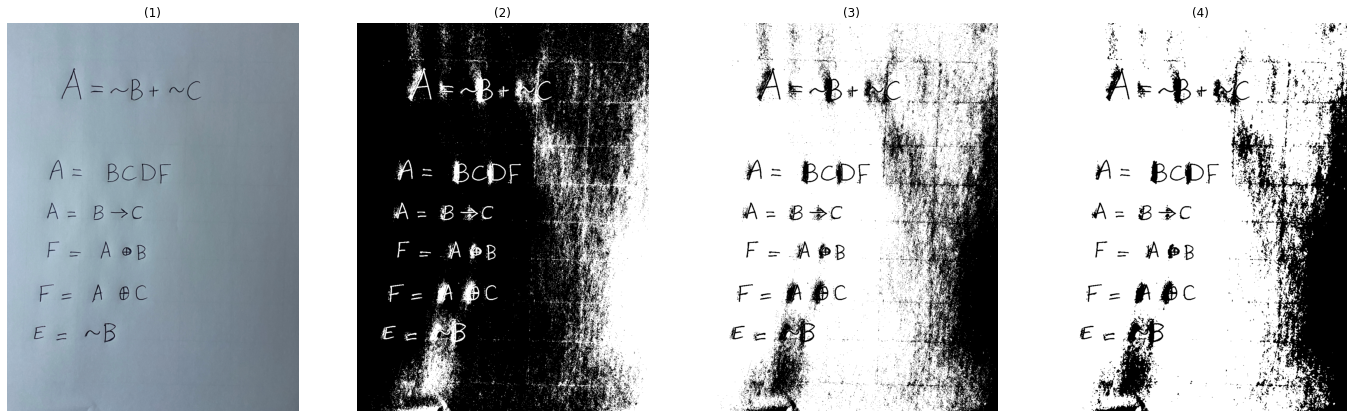

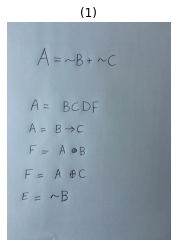

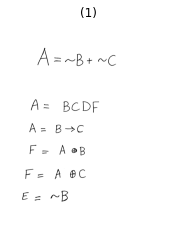

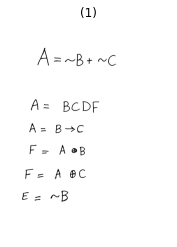

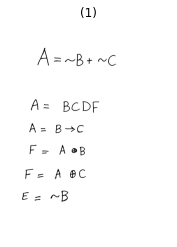

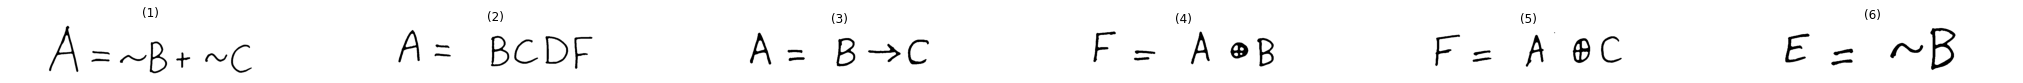

img shape: (305, 1662), max=255, min=0,median=255.0 and type uint8
tolerance: 83.10000000000001


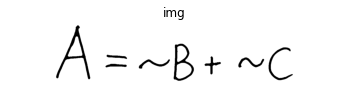

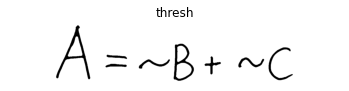

contours before area filtering
1258.5, -4489.0, 2093.5, 2064.5, 1876.5, 1126.5, 3373.0, -2859.5, 13060.0, -3971.5, 11436.5, -504944.0, 
average_area 13821.375
max_width 171
max_height 268
contours after area filtering
45828, 7332, 18768, 7553, 6760, 19886, 
masks


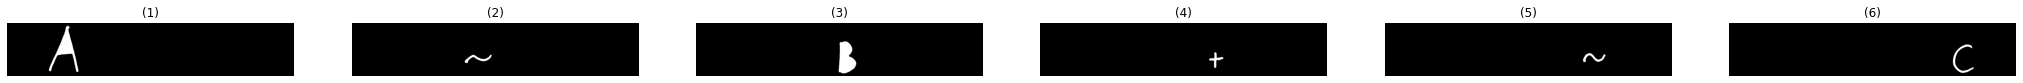

contours after merging


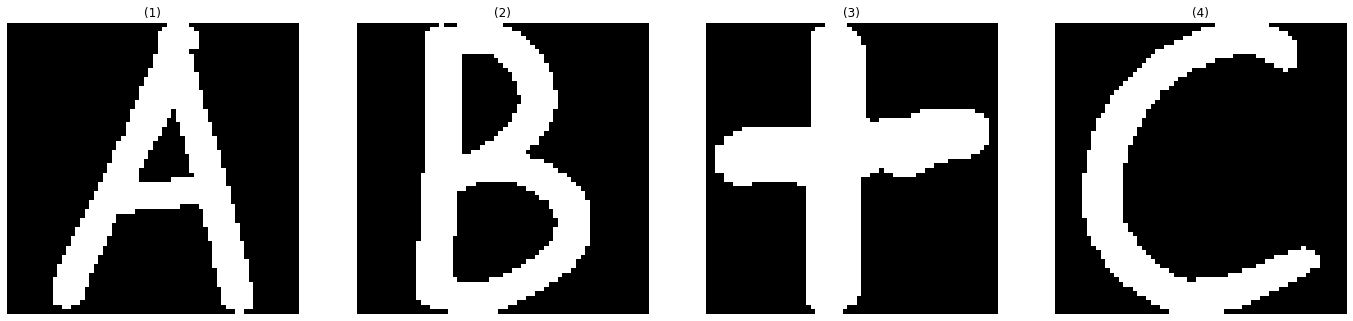

img shape: (234, 1508), max=255, min=0,median=255.0 and type uint8
tolerance: 75.4


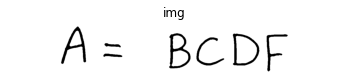

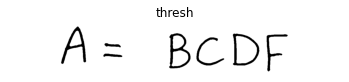

contours before area filtering
942.5, -3977.5, 832.5, 2980.0, -9003.5, -2407.0, 3302.5, 13465.0, 11436.0, -2255.5, 7082.0, -351131.0, 
average_area 12615.42857142857
max_width 127
max_height 170
contours after area filtering
19380, 15680, 16256, 17545, 16393, 
masks


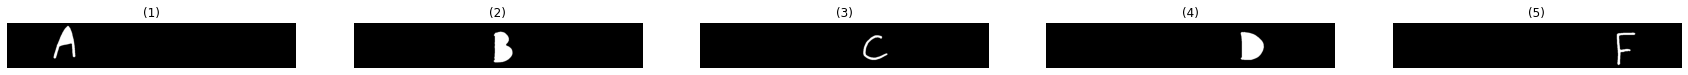

contours after merging


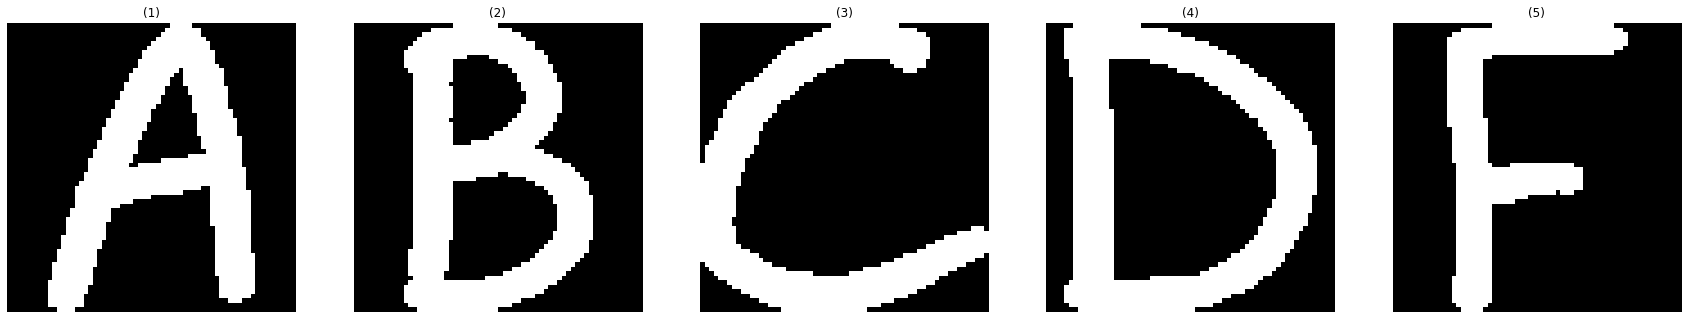

img shape: (181, 1296), max=255, min=0,median=255.0 and type uint8
tolerance: 64.8


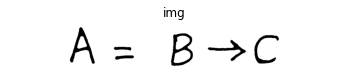

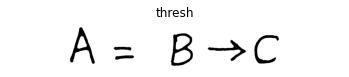

contours before area filtering
868.0, -2308.0, 767.0, 2727.0, -1094.5, -1949.0, 2838.5, 8492.5, 4962.5, -233100.0, 
average_area 8444.5
max_width 149
max_height 143
contours after area filtering
14014, 11049, 12367, 10767, 
masks


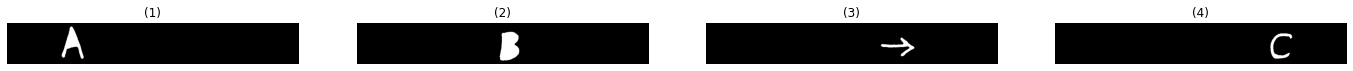

contours after merging


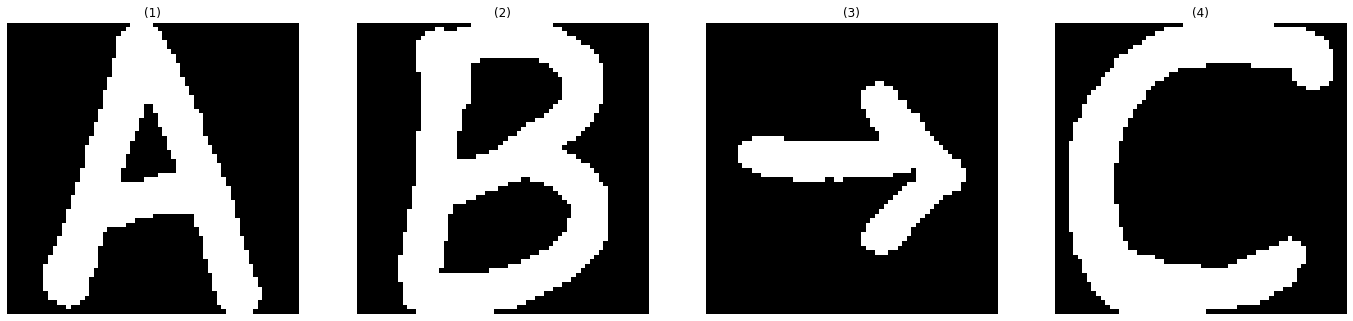

img shape: (189, 1313), max=255, min=0,median=255.0 and type uint8
tolerance: 65.65


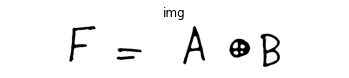

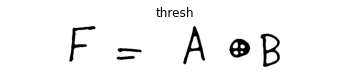

contours before area filtering
796.5, -1444.5, -70.0, -198.0, 1065.0, -190.0, -343.5, 4551.5, -1751.5, -944.5, 7173.0, 4637.0, 3076.5, -246656.0, 
average_area 7817.0
max_width 105
max_height 149
contours after area filtering
14595, 1728, 13112, 6216, 10010, 
masks


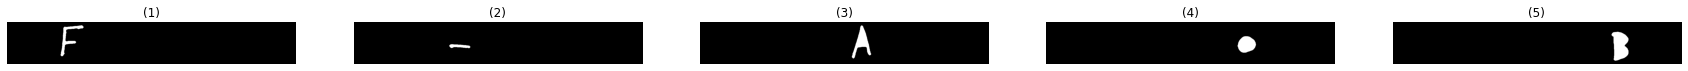

contours after merging


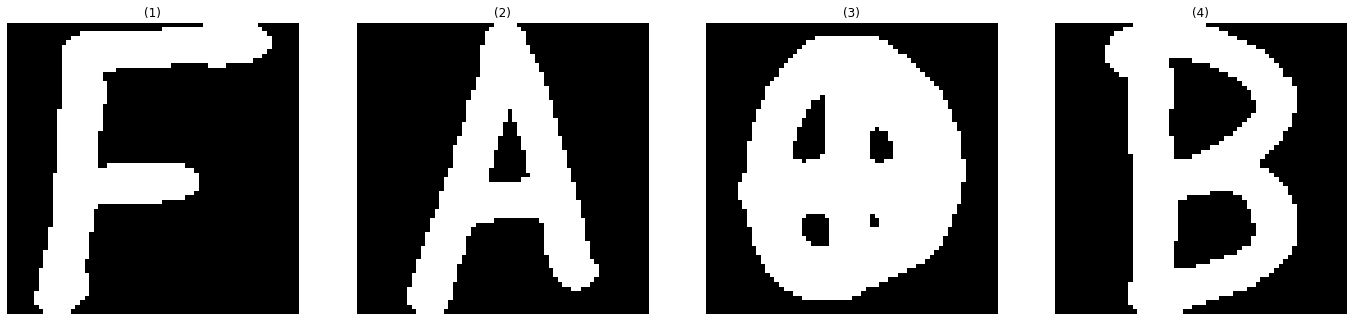

img shape: (196, 1392), max=255, min=0,median=255.0 and type uint8
tolerance: 69.60000000000001


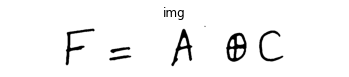

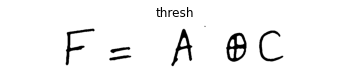

contours before area filtering
1024.5, -599.0, -888.0, 1004.5, -416.5, -674.5, -837.5, 7810.5, 2828.0, 4657.0, 3591.0, 19.5, -271245.0, 
average_area 8586.0
max_width 122
max_height 154
contours after area filtering
18544, 2139, 2295, 13706, 10320, 13056, 
masks


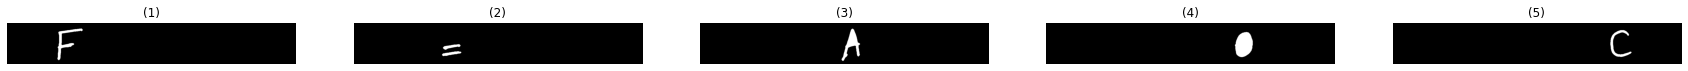

contours after merging


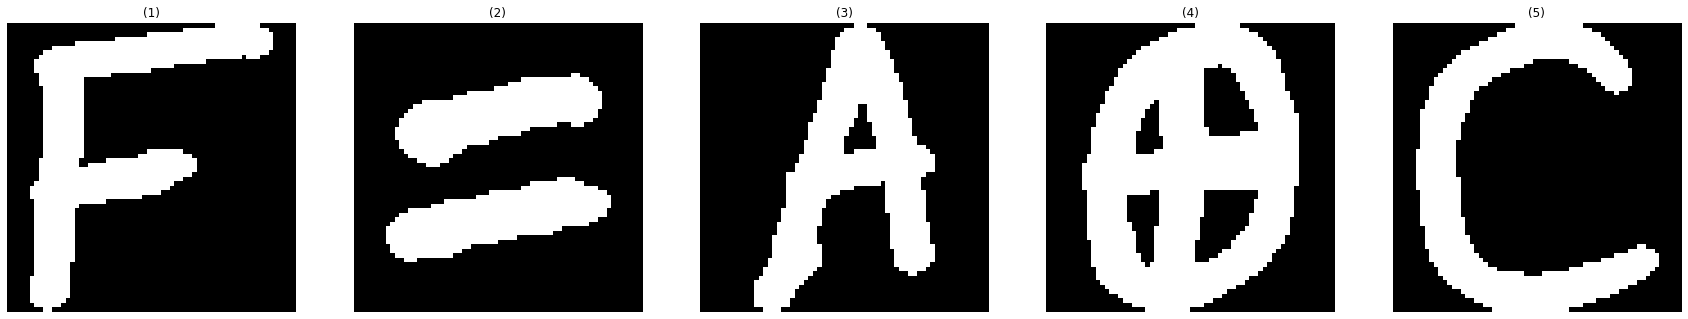

img shape: (198, 1157), max=255, min=0,median=255.0 and type uint8
tolerance: 57.85


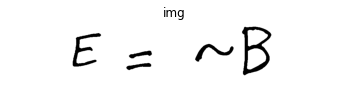

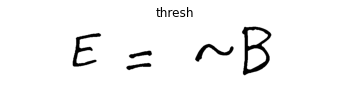

contours before area filtering
1053.0, 1060.0, -3388.0, 2333.5, 3435.0, -2738.5, 12214.5, -227732.0, 
average_area 8371.6
max_width 135
max_height 168
contours after area filtering
11600, 2288, 2296, 8370, 17304, 
masks


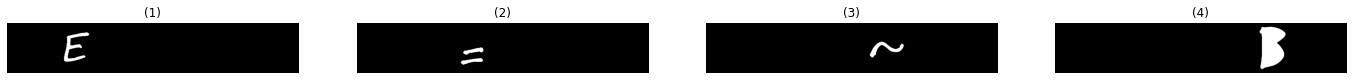

contours after merging


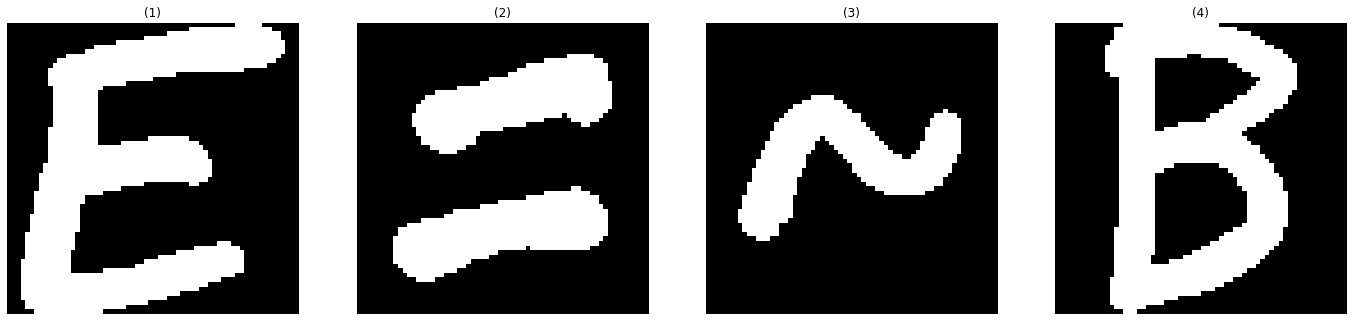

[array(['A', 'B', '+', 'C'], dtype='<U7'), array(['A', 'B', 'C', 'D', 'F'], dtype='<U7'), array(['A', 'B', 'implies', 'C'], dtype='<U7'), array(['F', 'A', 'xor', 'B'], dtype='<U7'), array(['F', 'implies', 'A', 'xor', 'C'], dtype='<U7'), array(['E', 'B', '~', 'B'], dtype='<U7')]
['A' '=' '+' 'C']
or C 
['A' '=' 'C' 'D' 'F']
C and D and F 
['A' '=' 'implies' 'C']
implies C 
['F' '=' 'xor' 'B']
xor B 
['F' '=' 'A' 'xor' 'C']
A xor C 
['E' '=' '~' 'B']
~ B 


IndexError: list index out of range

In [140]:
image = cv2.imread("./test_images/ex2.jpg")

result = solve_expression(image, is_table=False, showTrace=True)


